In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("car_age_price.csv")

In [3]:
# Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None
              Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000


In [4]:
# 1. Find the best linear relationship between year and price
X = df[['Year']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Best Linear Relationship: Price = {:.2f} * Year + {:.2f}".format(lin_reg.coef_[0], lin_reg.intercept_))

Best Linear Relationship: Price = 47608.57 * Year + -95520922.49


In [5]:
# 2. Predict the possible price of a 2022 model second-hand grand i10
year_2022 = np.array([[2022]])
predicted_price_linear = lin_reg.predict(year_2022)
print("Predicted Price for 2022 (Linear Regression):", predicted_price_linear[0])

Predicted Price for 2022 (Linear Regression): 743601.6159450412


In [6]:
# 3. Lasso Regression Model
lasso_reg = Lasso(alpha=1.0)  # Regularization parameter
lasso_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression - MSE:", mse_linear, "R2 Score:", r2_linear)
print("Lasso Regression - MSE:", mse_lasso, "R2 Score:", r2_lasso)

# Determine which model performs better
if r2_linear > r2_lasso:
    print("Linear Regression performs better.")
else:
    print("Lasso Regression performs better.")

# Predict price for 2022 model using Lasso Regression
predicted_price_lasso = lasso_reg.predict(year_2022)
print("Predicted Price for 2022 (Lasso Regression):", predicted_price_lasso[0])

Linear Regression - MSE: 4326906256.829671 R2 Score: 0.36759313425902185
Lasso Regression - MSE: 4326859771.015669 R2 Score: 0.3675999284778446
Lasso Regression performs better.
Predicted Price for 2022 (Lasso Regression): 743599.3742714375


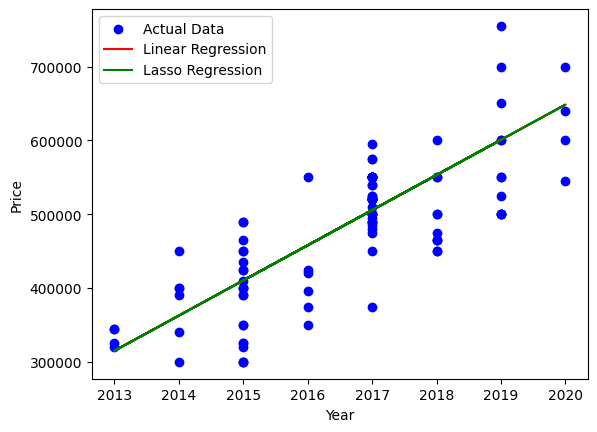

In [7]:
# Plot results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()